**Profile DICODING**
- Nama: Fathan Askar
- Username: askarfathan
- Email: askarfathan@gmail.com
- Domisili: Bandung

In [43]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [44]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip
!rm -r rockpaperscissors/rps-cv-images

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [45]:
base_dir = 'rockpaperscissors'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4, #60% train, 40% validation
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(300, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [46]:
#Membangun Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [48]:
#Training Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)
model.save('rockpaperscissors_model.keras')

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 287s 7s/step - accuracy: 0.8668 - loss: 0.3753 - val_accuracy: 0.8727 - val_loss: 0.3301
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6875 - loss: 0.5697 - val_accuracy: 0.9000 - val_loss: 0.1877
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 313s 7s/step - accuracy: 0.8808 - loss: 0.3046 - val_accuracy: 0.9016 - val_loss: 0.2896
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9062 - loss: 0.6655 - val_accuracy: 0.9000 - val_loss: 0.2965
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 285s 7s/step - accuracy: 0.9066 - loss: 0.2557 - val_accuracy: 0.9225 - val_loss: 0.2378
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8750 - loss: 0.2740 - val_accuracy: 0.9000 - val_loss: 0.3547
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 286s 7s/step - accuracy: 0.9297 - loss: 0.1924 - val_accuracy: 0.9132 - val_loss: 0.2350
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9062 - loss: 0.3012 - val_accuracy: 0.9000 - v

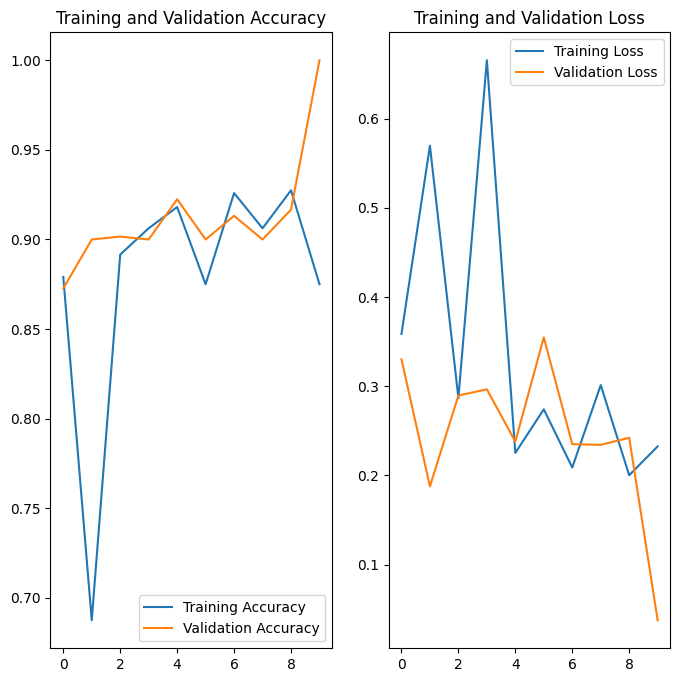

In [49]:
#Melihat Akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving hand6.jpg to hand6 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


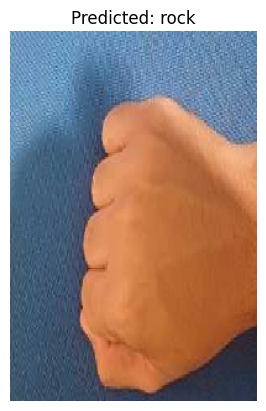

Predicted class: rock


In [55]:
uploaded = files.upload()
for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(300, 200))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    predicted_class = classes_to_include[np.argmax(prediction)]
    plt.imshow(image.img_to_array(img).astype("uint8"))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    print(f"Predicted class: {predicted_class}")